# RoseNNa: A performant, portable library for neural network inference with application to computational fluid dynamics

Original authors of the paper: Ajay Bati, Spencer H. Bryngelson

Link to paper: https://www.sciencedirect.com/science/article/pii/S0010465523003971?via%3Dihub

Link to pre-print: https://arxiv.org/abs/2307.16322

Link to github repo: https://github.com/comp-physics/roseNNa

Author of this notebook: [Óscar Amaro](https://github.com/OsAmaro) (December 2023)

Data from paper retrieved with [WebPlotDigitizer](https://apps.automeris.io/wpd/). Results of notebook that are not from the paper were obtained by the author of this notebook with a ``3.5 GHz 6-Core Intel Xeon E5`` processor.

### Outline:
- [Installation](#Installation): PyTorch, libtorch, and RoseNNa
- [PyTorch vs libtorch vs roseNNa](#PyTorchVlibtorch): **PyTorch vs libtorch vs roseNNa**
- [Figure 2](#Figure2): Multilayer perceptron (MLP) time comparison (**RoseNNa vs PyTorch**)
- [Figure 3](#Figure3): Long Short-Term Memory (LSTM) time comparison (**RoseNNa vs PyTorch**)
- [Figure 4](#Figure4): Multilayer perceptron (MLP) model time comparison (**RoseNNa vs libtorch**)

### Installation <a id=Installation></a>

Some guidelines for installing the frameworks compared

**PyTorch**
> Get started: https://pytorch.org/get-started/locally/

> List of PyTorch backends: https://pytorch.org/docs/stable/backends.html

**libtorch**
> PyTorch C++: https://pytorch.org/cppdocs/installing.html

> examples: https://github.com/pytorch/examples/treemain/cpp

**RoseNNa**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
colors = ["lightblue","firebrick","seagreen","grey"]

### PyTorch vs libtorch vs roseNNa <a id=PyTorchVlibtorch></a>

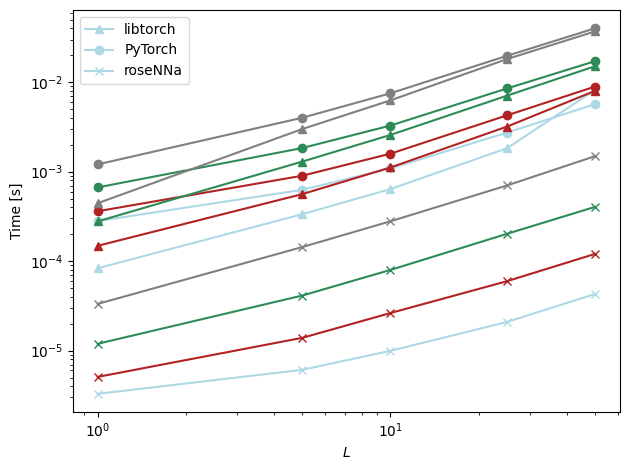

In [31]:
Llst = np.array([1,5,10,25,50])
dlst = np.array([10,25,50,100]) # the different 4 colors correspond to different number of neurons per layer

timings_libtorch = np.array(pd.read_csv('dataOwn/libtorch/inferenceTime_libtorch.csv', header=None))
timings_libtorch = timings_libtorch[:,:-1]

timings_PyTorch = np.array(pd.read_csv('dataOwn/PyTorch/inferenceTime_PyTorch.csv', header=None))
timings_PyTorch = timings_PyTorch[1:,:]

timings_roseNNa = np.array(pd.read_csv('dataOwn/roseNNa/Ld/inferenceTime_roseNNa.csv', header=None))
timings_roseNNa = np.reshape(timings_roseNNa[:,-1], (5,4))

for i in range(len(colors)):
    if i==0:
        plt.plot(Llst, timings_libtorch[:,i], '^-', color=colors[i], label='libtorch')
        plt.plot(Llst, timings_PyTorch[:,i], 'o-', color=colors[i], label='PyTorch')
        plt.plot(Llst, timings_roseNNa[:,i], 'x-', color=colors[i], label='roseNNa')
    else:
        plt.plot(Llst, timings_libtorch[:,i], '^-', color=colors[i])
        plt.plot(Llst, timings_PyTorch[:,i], 'o-', color=colors[i])
        plt.plot(Llst, timings_roseNNa[:,i], 'x-', color=colors[i])
plt.xlabel('$L$')
plt.ylabel('Time [s]')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

### Figure 2 <a id=Figure2></a>  Multilayer perceptron (MLP) time comparison (RoseNNa versus PyTorch)

roseNNa x20

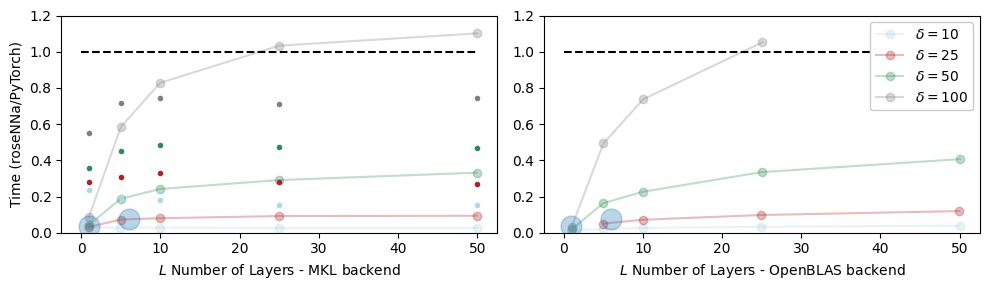

In [34]:
# fluctuations in the data will be due to uncertainty in selecting points in WPD
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
alphaPaper = 0.3
labels = ['$\delta=10$', '$\delta=25$', '$\delta=50$', '$\delta=100$']

### fig 2a
fil = open('dataWPD/fig2a/wpd.json')
data = json.load(fil)
for i in range(5):
    datatmp = data['datasetColl'][i]['data']
    datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
    indxs = np.argsort(datatmp2[:,0])
    if i!=4:
        axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o-', color=colors[i], label=labels[i], alpha=alphaPaper)
    else:
        axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o', markersize=15, alpha=alphaPaper)

# plot own results, roseNNa x20
timings_PyTorch = np.array(pd.read_csv('dataOwn/PyTorch/inferenceTime_PyTorch.csv', header=None))
timings_PyTorch = timings_PyTorch[1:,:]
timings_roseNNa = np.array(pd.read_csv('dataOwn/roseNNa/Ld/inferenceTime_roseNNa.csv', header=None))
timings_roseNNa = np.reshape(timings_roseNNa[:,-1], (5,4))
for i in range(4):
    axes[0].plot(np.array([1,5,10,25,50]), (timings_roseNNa/timings_PyTorch)[:,i]*20, '.', color=colors[i] )

### fig 2b
fil = open('dataWPD/fig2b/wpd.json')
data = json.load(fil)
for i in range(5):
    datatmp = data['datasetColl'][i]['data']
    datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
    indxs = np.argsort(datatmp2[:,0])
    if i!=4:
        axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o-', color=colors[i], label=labels[i], alpha=alphaPaper)
    else:
        axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o', markersize=15, alpha=alphaPaper)

        
axes[0].set_ylabel(r'Time (roseNNa/PyTorch)')
for i in range(2):
    x = np.linspace(0,1)
    axes[i].plot(x*50,1+x*0,'k--')
    axes[i].set_ylim([0,1.2])
axes[0].set_xlabel(r'$L$ Number of Layers - MKL backend')
axes[1].set_xlabel(r'$L$ Number of Layers - OpenBLAS backend')
plt.legend(loc='upper right', framealpha=1)
plt.tight_layout()
plt.show()

### Figure 3 <a id=Figure3></a> Long Short-Term Memory (LSTM) time comparison (RoseNNa/PyTorch)

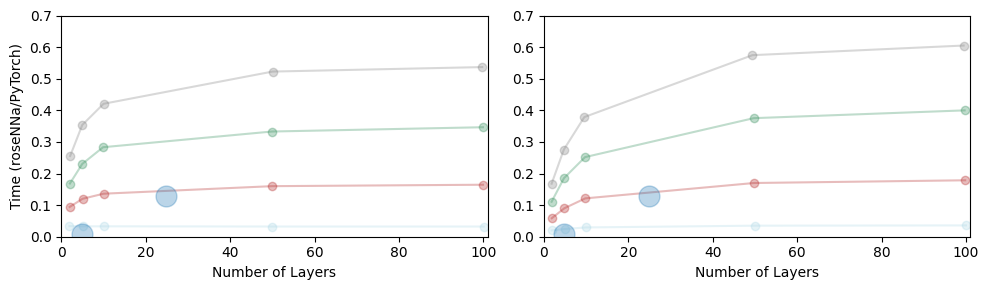

In [39]:
# fluctuations in the data will be due to uncertainty in selecting points in WPD
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
alphaPaper = 0.3

### fig 3a
fil = open('dataWPD/fig3a/wpd.json')
data = json.load(fil)
for i in range(5):
    datatmp = data['datasetColl'][i]['data']
    datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
    indxs = np.argsort(datatmp2[:,0])
    if i!=4:
        axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o-', color=colors[i], label='0', alpha=alphaPaper)
    else:
        axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o', markersize=15, label='0', alpha=alphaPaper)

### fig 3b
fil = open('dataWPD/fig3b/wpd.json')
data = json.load(fil)
for i in range(5):
    datatmp = data['datasetColl'][i]['data']
    datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
    indxs = np.argsort(datatmp2[:,0])
    if i!=4:
        axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o-', color=colors[i], label='0', alpha=alphaPaper)
    else:
        axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o', markersize=15, label='0', alpha=alphaPaper)

        
axes[0].set_ylabel(r'Time (roseNNa/PyTorch)')
for i in range(2):
    x = np.linspace(0,1)
    axes[i].plot(x*100,1+x*0,'k--')
    axes[i].set_xlabel(r'Number of Layers')
    axes[i].set_xlim([0,101])
    axes[i].set_ylim([0,0.7])
plt.tight_layout()
plt.show()

### Figure 4 <a id=Figure4></a> Multilayer perceptron (MLP) model time comparison (RoseNNa/libtorch)

roseNNa x20

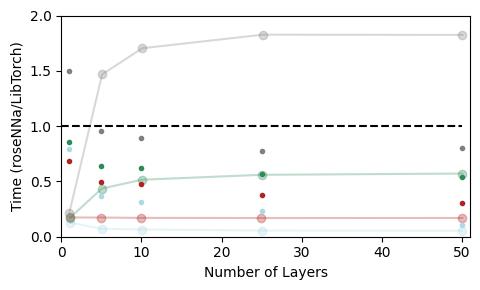

In [38]:
# fluctuations in the data will be due to uncertainty in selecting points in WPD
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,3))
alphaPaper = 0.3

### fig 4
fil = open('dataWPD/fig4/wpd.json')
data = json.load(fil)
for i in range(4):
    datatmp = data['datasetColl'][i]['data']
    datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
    indxs = np.argsort(datatmp2[:,0])
    axes.plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o-', label='0', color=colors[i], alpha=alphaPaper)


# plot own results, roseNNa x20
timings_libtorch = np.array(pd.read_csv('dataOwn/libtorch/inferenceTime_libtorch.csv', header=None))
timings_libtorch = timings_libtorch[:,:-1]
timings_roseNNa = np.array(pd.read_csv('dataOwn/roseNNa/Ld/inferenceTime_roseNNa.csv', header=None))
timings_roseNNa = np.reshape(timings_roseNNa[:,-1], (5,4))
for i in range(4):
    axes.plot(np.array([1,5,10,25,50]), (timings_roseNNa/timings_libtorch)[:,i]*20, '.', color=colors[i] )
    
axes.set_ylabel(r'Time (roseNNa/LibTorch)')
x = np.linspace(0,1)
axes.plot(x*50,1+x*0,'k--')
axes.set_xlabel(r'Number of Layers')
axes.set_xlim([0,51])
axes.set_ylim([0,2])
plt.tight_layout()
plt.show()